# 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy import stats
#import folium
import json
%matplotlib inline

### RQ1

C:\Users\Daniele\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0.5,'Average Trips per Day'), Text(0.5,0,'Month')]

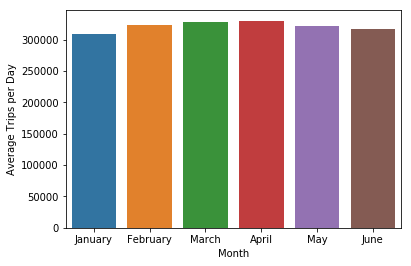

In [2]:
#list of months
months = 'January February March April May June'.split()
#create a new DataFrame
df_new = pd.Series(index = months)
for i in range(6):
    string = "Filtered"+str(i+1)+".csv"
    #read csv and take only tpep_pickup_datetime with usecols
    df = pd.read_csv(string,usecols=["tpep_pickup_datetime"])
    #using datetime in order to convert argument to datetime.
    df['day'] = pd.to_datetime(df["tpep_pickup_datetime"],format='%Y-%m-%d %H:%M:%S').dt.day
    #delete missing value
    df.dropna(inplace=True)
    #computation of average daily trip for every month
    df_new[months[i]] = len(df['day'])/(len(df['day'].unique()))
    #free memory
    del df
ax = sns.barplot(x=df_new.index, y=df_new.values)
ax.set(xlabel='Month', ylabel='Average Trips per Day')

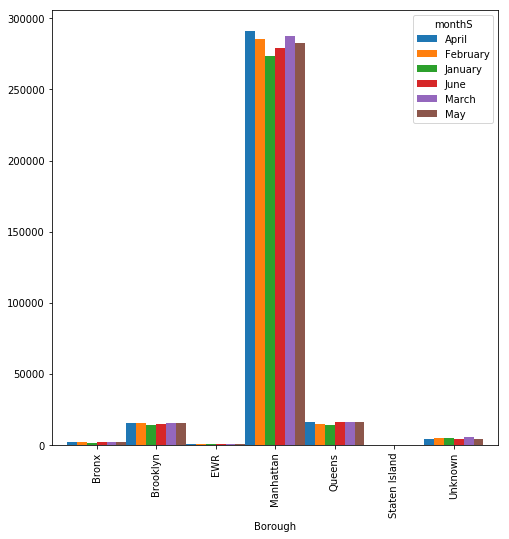

In [10]:
#create a list
dataframe=[]
#read csv file of zone
zones = pd.read_csv("taxi_zone_lookup.csv")
for i in range(1,7):
    #read csv file of taxi and take only tpep_pickup_datetime,monthS and DOLocationID with usecols
    df = pd.read_csv("Filtered"+str(i)+".csv",usecols=["tpep_pickup_datetime","monthS","DOLocationID"])
    #select the specific month
    df=df.loc[df.monthS==i]
    #merge Data Frame of taxi with DataFrame of zone and take only Borough,tpep_pickup_datetime and monthS column
    df = pd.merge(df,zones[['LocationID','Borough']], left_on=['DOLocationID'], right_on=['LocationID'])[['Borough',"tpep_pickup_datetime","monthS"]]
    #using datetime in order to convert argument to datetime
    df['day'] = pd.to_datetime(df["tpep_pickup_datetime"],format='%Y-%m-%d %H:%M:%S').dt.day
    #computation of daily trip average for every month in every Borough, 
    df2 =(df.groupby(['monthS','Borough']).count()['day']//len((df["day"].unique().tolist())))
    dataframe.append(df2)
d=pd.concat(dataframe)
#rename of index, with inplace=True the data is renamed in place
d.rename(index={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June'},inplace=True)
#We have a multi index series(the output of groupby), ustack function on level 0 convert the 0 level of index as a columns 
         #and the level -1 as an index"""
d.unstack(level=0).plot.bar(width=1.0, figsize=(8, 8))

### RQ2

In [5]:
zones = pd.read_csv("taxi_zone_lookup.csv")
#set the time slots
time_slots = ['1.[1-6 AM]','2.[7-12 AM]','3.[13-18 PM]','4.[19-00 PM]']
#creation of new Dataframe
df_total = pd.DataFrame([])
for i in range(1,7):
    string = "Filtered"+str(i)+".csv"
    #import the dataset with required columns
    df = pd.read_csv(string,usecols=['hourS','DOLocationID','passenger_count'])
    #delete the missing value
    df.dropna(inplace=True)
    #add to the new Dataframe
    df_total = df_total.append(df,ignore_index=True)
    #free memory
    del df
#merge dt_total with zone.csv and take only required colums
df_total = pd.merge(df_total,zones[['LocationID','Borough']], left_on=['DOLocationID'], right_on=['LocationID'])[['Borough','hourS','passenger_count']]
df_total['time_slots'] = df_total.hourS.apply(lambda x:time_slots[abs((x-1)//6)])

C:\Users\Daniele\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Overall New York')

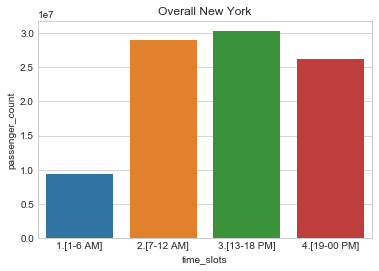

In [3]:
#gropby and sum are used in order to have the total number of passengers for every time slot
df_total=df_total.groupby('time_slots',as_index=False).sum()
#sort the value
df_total.sort_values(by='time_slots',inplace=True)
#plot
sns.set_style("whitegrid")
fig = sns.barplot(x=df_total.time_slots,y=df_total.passenger_count)
fig.set_title('Overall New York')

C:\Users\Daniele\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


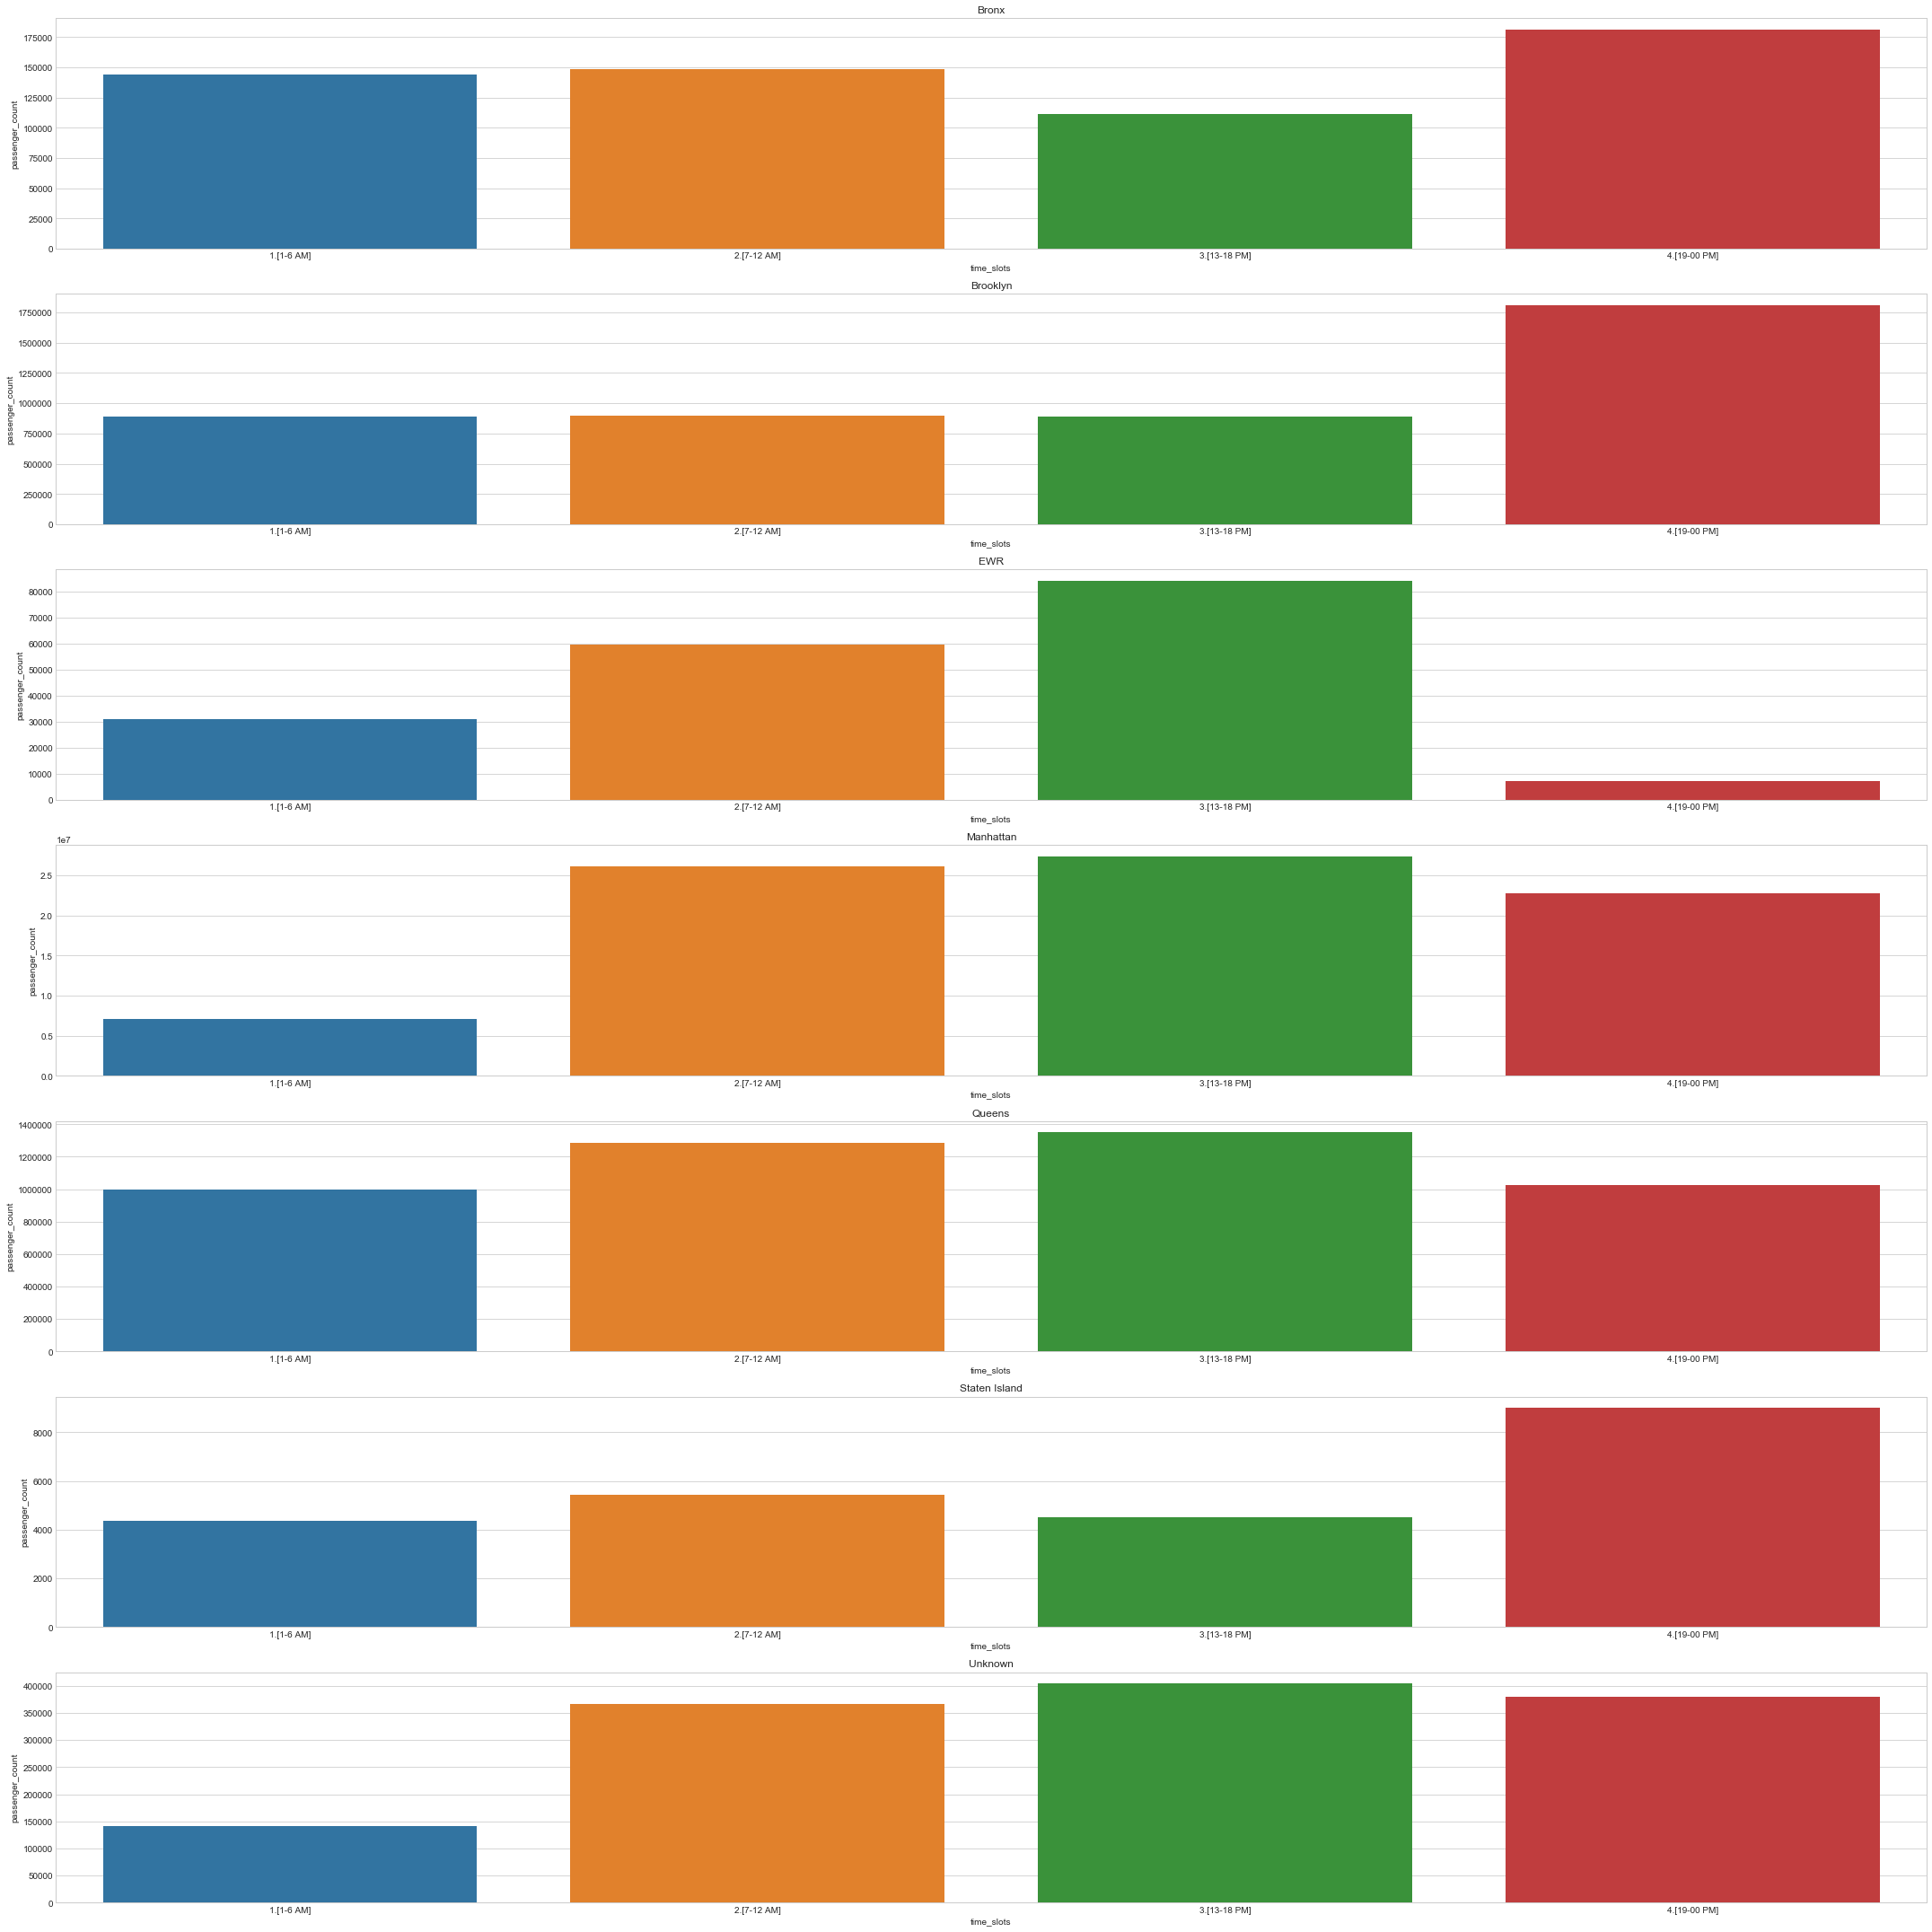

In [6]:
num_plots = 7
fig, axes = plt.subplots(num_plots,1,figsize=(30,30))
#a list of boroughs is created
Boroughs = df_total.Borough.unique()
#sorting boroughs
Boroughs.sort()
for Borough in Boroughs:
    #chose the data frame with corresponding borough
    df = df_total[df_total['Borough']==Borough]
    #use groupby and .sum() in order to take the of passengers in each time slot
    df=df.groupby('time_slots',as_index=False).sum()
    #sort values
    df.sort_values(by='time_slots',inplace=True)
    #set the axes for the current subplot
    ax_curr = axes[np.where(Boroughs == Borough)[0][0]]
    sns.set_style("whitegrid")
    fg = sns.barplot(x=df.time_slots,y=df.passenger_count,ax=ax_curr)
    ax_curr.set_title(Borough)
    del df
fig.tight_layout()

### RQ3

In [3]:
df=[]
for i in range(1,7):
    #import the dataset
    d = pd.read_csv("Filtered"+str(i)+".csv",usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID','DOLocationID'])
    #create column called start_time where to_datetime is used to convert argument in tpep_pickup_datetime to datetime format
    d['start-time'] = pd.to_datetime(d['tpep_pickup_datetime'])
    #create column called End_time where to_datetime is used to convert argument in tpep_dropoff_datetime to datetime format
    d['End-time'] = pd.to_datetime(d['tpep_dropoff_datetime'])
    #compute difference between tpep_dropoff_datetime and tpep_pickup_datetime
    d["duration"]=d["End-time"]-d["start-time"]
    #convert the duration to minute and we assign into new coloum
    d["durationm"]=d["duration"]/pd.Timedelta('1 minute')
    d["durations"]=d["duration"]/pd.Timedelta('1 second')
    d['years'] = pd.to_datetime(d["tpep_pickup_datetime"],format='%Y-%m-%d %H:%M:%S').dt.year
    d['yeare'] = pd.to_datetime(d["tpep_dropoff_datetime"],format='%Y-%m-%d %H:%M:%S').dt.year
    #append to list df in order to concatenate in next sesssion
    df.append(d)
    del d


In [6]:
dft=[]
for d in df:
    #PULocationID which are corresponded to unknown zones are filtered
    dft.append(d.loc[(d.durations>0)&(d.durations<5000)&(d.PULocationID!=264)&(d.PULocationID!=265)])
del df    

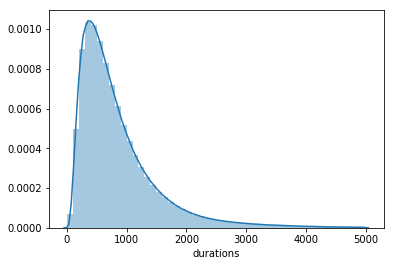

In [7]:
#concatenate the list of datasets in dft list into DF dataframe
DF=pd.concat(dft)
DF=DF.reset_index(drop=True)
sns.distplot(DF["durations"])  

In [8]:
zone=pd.read_csv("taxi_zone_lookup.csv")
dfz=zone[['LocationID','Borough']]    

for d in dft:
    d.rename(columns={'PULocationID':'LocationID'},inplace=True)
dj=[]
for d in dft:
    #each dataframe in dft list is joined with the zone dataset 
    dj.append(dfz.join(d.set_index('LocationID'), on='LocationID'))    
dj1=[]
for d in dj:
    #for each dataframe in dj the index is reset and the previous index is dropped
    d=d.reset_index(drop=True)
    dj1.append(d[["Borough","LocationID","durations"]])
dj1=pd.concat(dj1)
dj1=dj1.reset_index(drop=True)
#take the unique values of borough and convert it to list
subset=dj1["Borough"].unique().tolist()
#the range is fom 0 to 6 because last one (7) is unknown
subset=subset[0:6]  

Text(0,0.5,'Density')

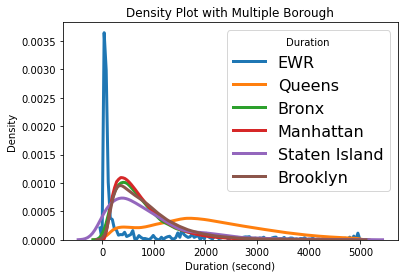

In [9]:
#in subset we have all boroughs 
for s in subset:
    l = dj1[dj1['Borough'] == s]
    l=l.dropna()
    # Draw the density plot
    sns.distplot(l['durations'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = s)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Duration')
plt.title('Density Plot with Multiple Borough')
plt.xlabel('Duration (second)')
plt.ylabel('Density')

### RQ4

C:\Users\Daniele\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'payment type for every Borough')

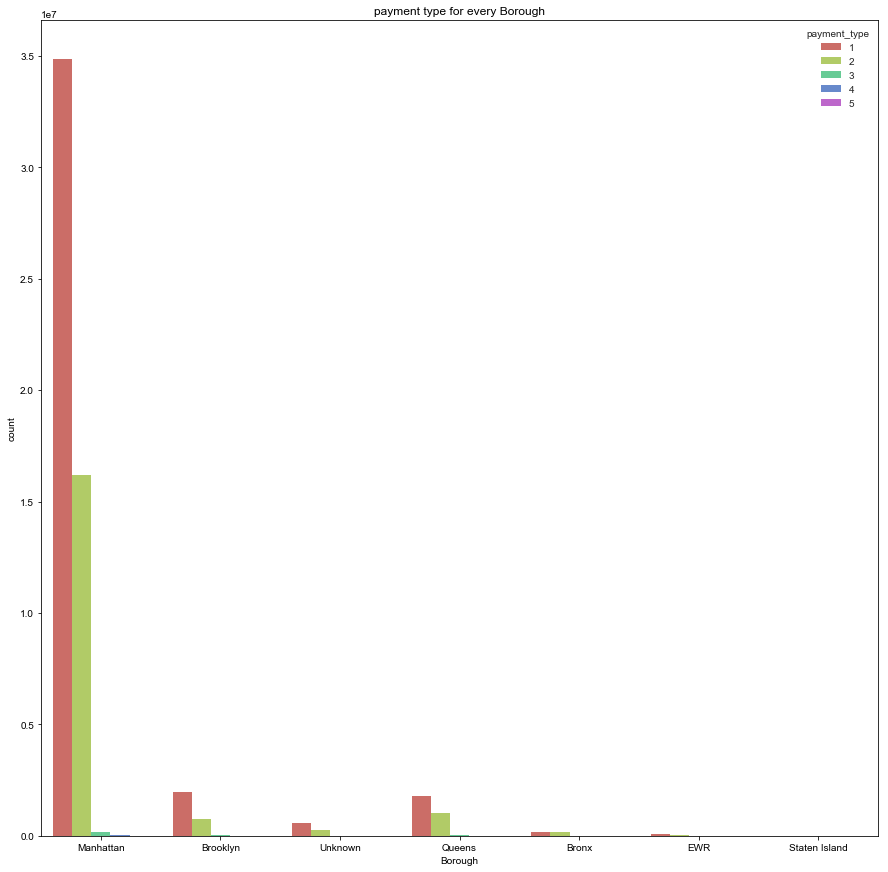

In [2]:
zones = pd.read_csv("taxi_zone_lookup.csv")
#list of month
months = 'January February March April May June'.split()
#creation of a DataFrame
df_total = pd.DataFrame([])
#plot specifications
fig, axes = plt.subplots(1,1,figsize=(15,15))
for i in range(1,7):
    string = "Filtered"+str(i)+".csv"
    #import dataset
    df = pd.read_csv(string)
    #select the columns useful for carrying out the analysis 
    df = df[["DOLocationID","payment_type","monthS"]]
    #merge df with the zone.csv and take only Borough,payment_type and month
    df = pd.merge(df,zones[['LocationID','Borough']], left_on=['DOLocationID'], right_on=['LocationID'])[['Borough','payment_type','monthS']]
    #add to the  df_total dataframe
    df_total = df_total.append(df,ignore_index=True)
    #free memory
    del df
#created a new column called df_total['month'] in order to assign the name to each month; to do this the lambda function is applied
df_total['month'] = df_total['monthS'].apply(lambda x : months[x-1])
sns.set_style("whitegrid")
fg = sns.countplot(x='Borough', hue='payment_type', data=df_total,palette='hls')
fg.set_title('payment type for every Borough')

In [3]:
manhattan_value = df_total.loc[df_total['Borough'] == 'Manhattan']['payment_type']
Bronx_value = df_total.loc[df_total['Borough'] == 'Bronx']['payment_type']
Brooklyn_value = df_total.loc[df_total['Borough'] == 'Brooklyn']['payment_type']
EWR_value = df_total.loc[df_total['Borough'] == 'EWR']['payment_type']
Queens_value = df_total.loc[df_total['Borough'] == 'Queens']['payment_type']
State_Island_value = df_total.loc[df_total['Borough'] == 'Staten Island']['payment_type']

In [4]:
list=[manhattan_value.value_counts().sort_index(axis=0),Brooklyn_value.value_counts().sort_index(axis=0),EWR_value.value_counts().sort_index(axis=0),Queens_value.value_counts().sort_index(axis=0),State_Island_value.value_counts().sort_index(axis=0)]
for i in list:
    i[5]=0
list.append(Bronx_value.value_counts().sort_index(axis=0))    

In [6]:
chi_test=np.array(list).T
chi_test_2=pd.DataFrame(chi_test)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(chi_test_2)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
156541.60503736802


===Degrees of Freedom===
20


===P-Value===
0.0


===Contingency Table===
[[3.47538716e+07 1.87585429e+06 7.28290791e+04 1.92084781e+06
  9.19398808e+03 2.43156201e+05]
 [1.62387022e+07 8.76490524e+05 3.40292943e+04 8.97513687e+05
  4.29587920e+03 1.13614425e+05]
 [1.98118710e+05 1.06935375e+04 4.15171101e+02 1.09500286e+04
  5.24114571e+01 1.38614176e+03]
 [6.32065696e+04 3.41160018e+03 1.32453624e+02 3.49342950e+03
  1.67210276e+01 4.42226106e+02]
 [8.93972951e-01 4.82525519e-02 1.87338054e-03 4.94099190e-02
  2.36496720e-04 6.25470074e-03]]


### RQ5

In [10]:
df_total = pd.DataFrame([])
for i in range(1,7):
    string = "Filtered"+str(i)+".csv"
    df = pd.read_csv(string,usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'])
    df = df[df['trip_distance']>2]  
    df.dropna(inplace=True)
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['trip_duration'] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"])
    df['trip_duration'] = pd.to_timedelta(df['trip_duration']).apply(lambda x:x.seconds/60)
    df_total = df_total.append(df[['trip_distance','trip_duration']],ignore_index=True)
    del df

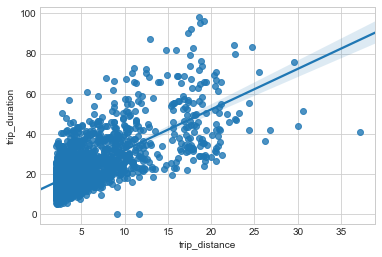

In [11]:
df1 = df_total[(df_total['trip_duration'] <= 100) & (df_total['trip_distance'] <= 40)]
ax = sns.regplot(x="trip_distance", y="trip_duration", data=df1.sample(2000))

In [12]:
correlation = df1.corr(method='pearson')
print(correlation)

               trip_distance  trip_duration
trip_distance       1.000000       0.706132
trip_duration       0.706132       1.000000


### CRQ1

In [9]:
dft=[]
for i in range(1,7):
    df=pd.read_csv("Filtered"+str(i)+".csv",usecols=['fare_amount','trip_distance','tpep_dropoff_datetime','tpep_pickup_datetime','PULocationID','total_amount'])
    df["Pricem"]=df["fare_amount"]/df["trip_distance"]
    df['start-time'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['End-time'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    df["durationm"]=(df["End-time"]-df["start-time"])/pd.Timedelta('1 minute')
    df["durations"]=(df["End-time"]-df["start-time"])/pd.Timedelta('1 second')
    df["Pricem/m"]=df["Pricem"]/df["durationm"]
    df=df.loc[(df.durations>20) & (df.fare_amount>0) & (df.trip_distance>0.1) & (df.total_amount>0.8) & (df.PULocationID!=264) & (df.PULocationID!=265)]
    df=df.reset_index(drop=True)
    dft.append(df[["Pricem","PULocationID","Pricem/m"]])
    del df

In [11]:
dft=pd.concat(dft)
dft=dft.reset_index(drop=True)
d=dft.loc[(dft.Pricem<10) & (dft['Pricem/m']<3)]

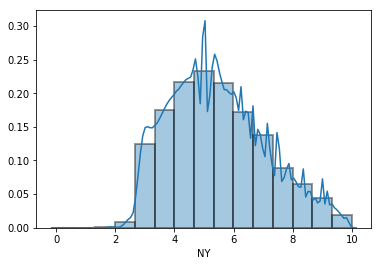

In [12]:
sns.distplot(d['Pricem'],kde=True,bins=15,hist_kws=dict(edgecolor="k", linewidth=2),axlabel="NY")

In [13]:
zone=pd.read_csv("taxi_zone_lookup.csv")
dfz=zone[['LocationID','Borough']]
d.rename(columns={'PULocationID':'LocationID'},inplace=True)
dfz=dfz.join(d.set_index('LocationID'), on='LocationID')
dfz=dfz.reset_index(drop=True)

C:\Users\Daniele\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
Boroughs = (dfz["Borough"].unique().tolist())[0:6]
dm=pd.DataFrame(columns=['mean','std'],index=Boroughs)

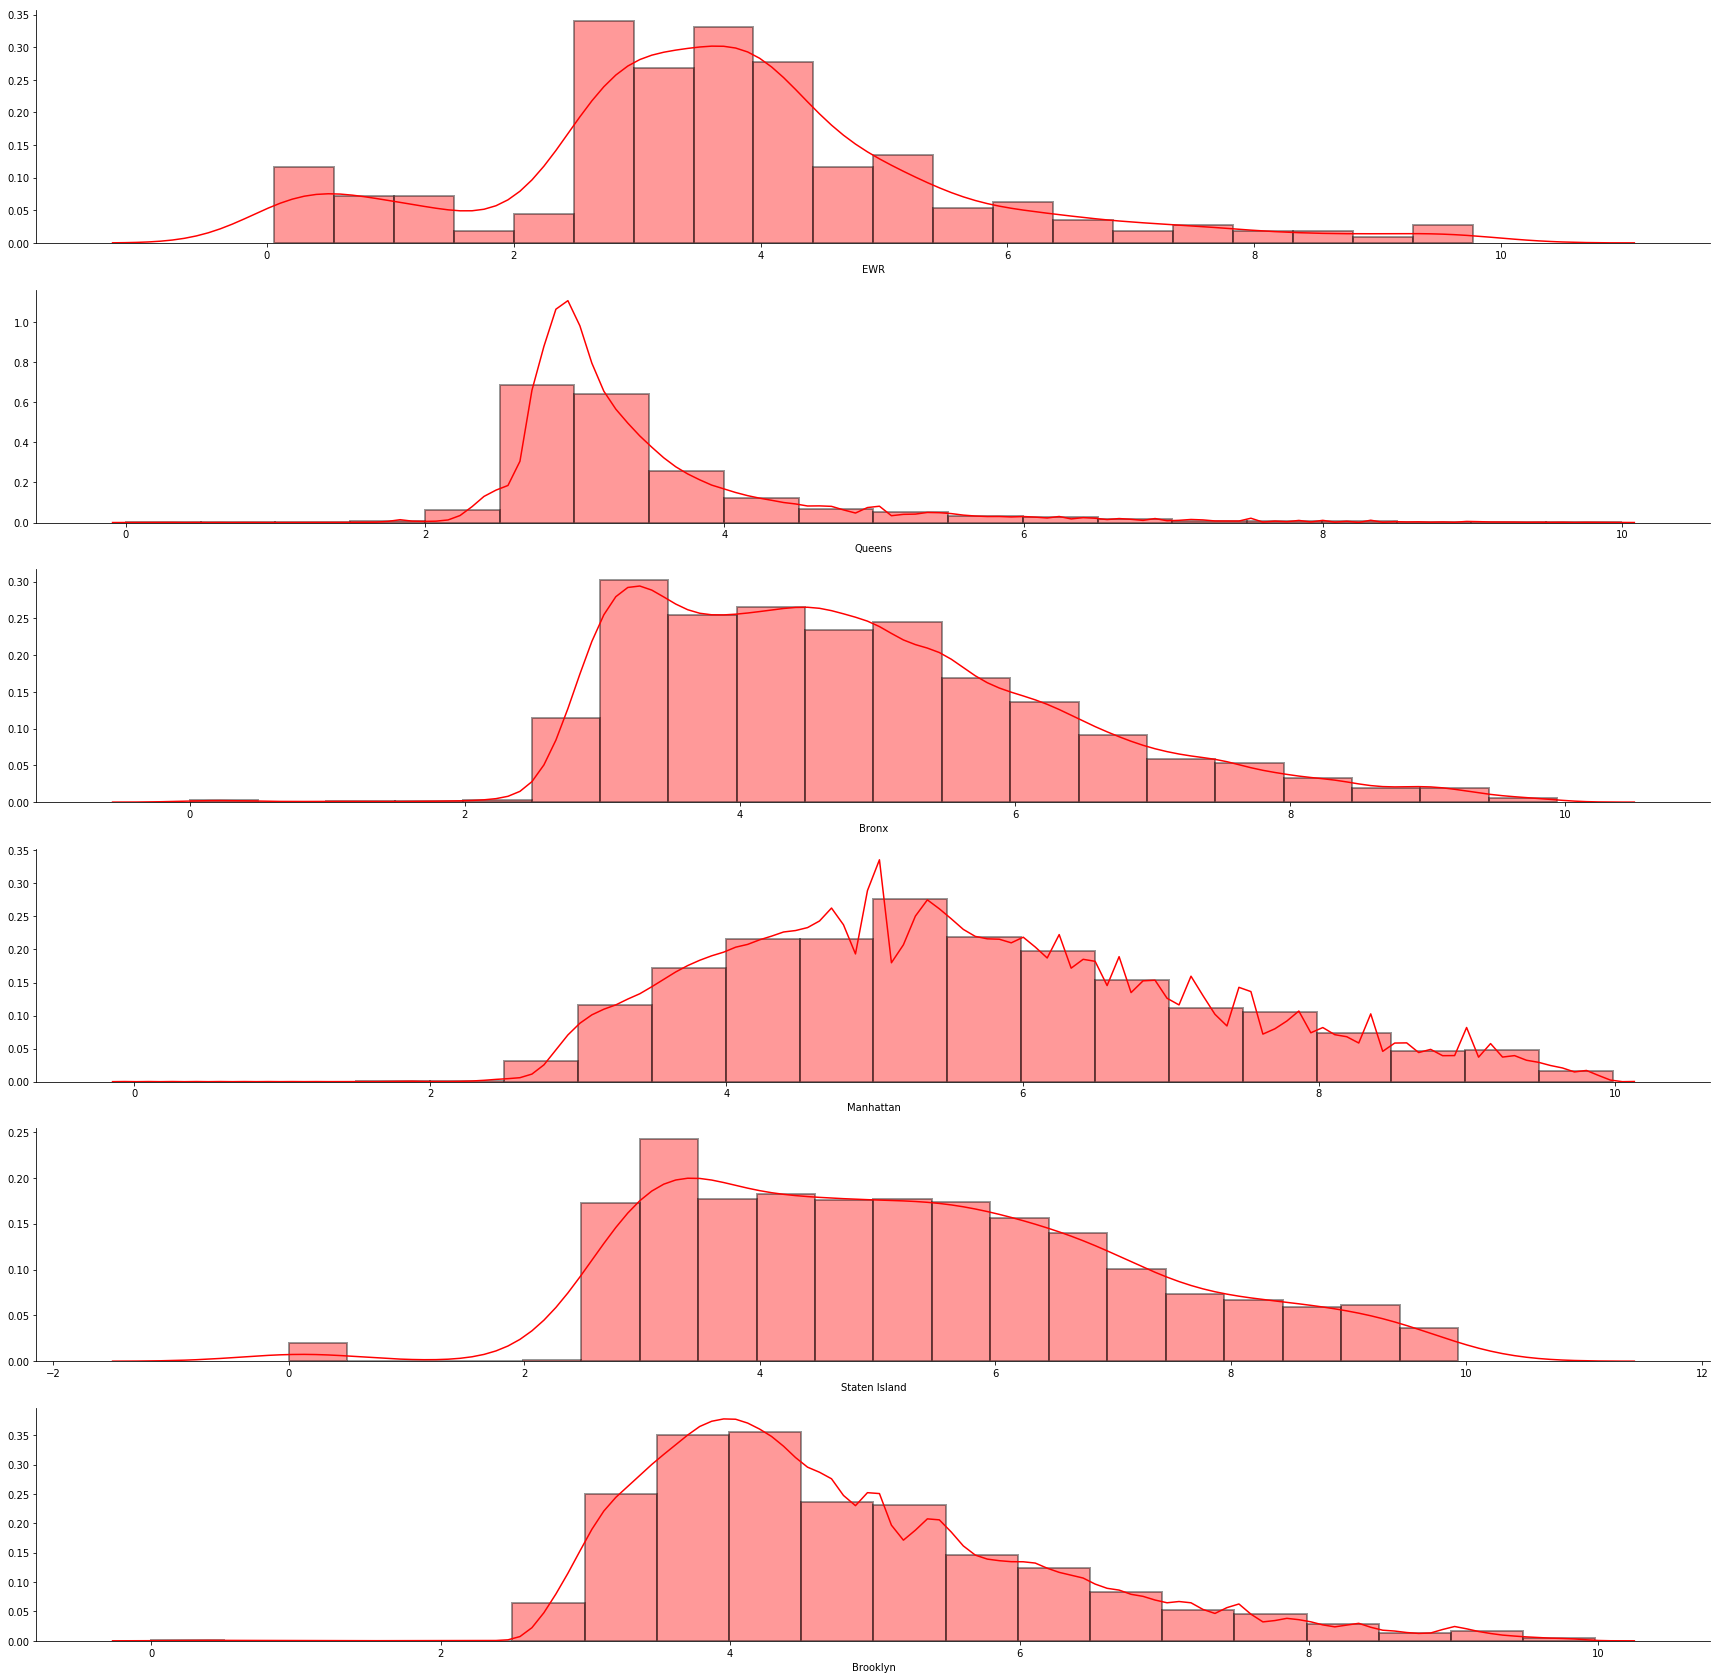

In [19]:
import matplotlib.pyplot as plt
i=0
Boroughs = (dfz["Borough"].unique().tolist())[0:6]
fig, axes = plt.subplots(6,1,figsize=(30,30))
for l in Boroughs:
    a=dfz.loc[dfz.Borough==l]
    a=a.dropna()
    m=a["Pricem"].mean()
    s=a["Pricem"].std()
    dm.loc[l,"mean"]=m
    dm.loc[l,"std"]=s
    #ax_curr = axes[np.where(Boroughs == l)[0][0]]
    sns.distplot(a['Pricem'],kde=True,bins=20,color='red',hist_kws=dict(edgecolor="k", linewidth=2),ax=axes[i],axlabel=l)
    #sns.distplot(a['Pricem'],kde=True,bins=15,hist_kws=dict(edgecolor="k", linewidth=2,alpha=0.5),ax=ax_curr,label='Overall New York')
    #axes.legend()
    sns.despine()
    i+=1
#print(dm)

In [21]:
dm

,mean,std
EWR,3.68835,1.82222
Queens,3.45176,0.988455
Bronx,4.81454,1.48507
Manhattan,5.61227,1.57617
Staten Island,5.25497,1.92008
Brooklyn,4.77438,1.36594


In [22]:
from scipy import stats
boroughs=dfz["Borough"].unique().tolist()[0:6]
Boroughs1=boroughs
idx = pd.MultiIndex.from_product([boroughs,
                                  ['t-value', 'p-value', 'H0 hypothesis']])
col = boroughs
dt = pd.DataFrame('-', idx, col)
for i in boroughs:
    a=dfz.loc[dfz.Borough==i]["Pricem"]
    a=a.dropna()
    for j in Boroughs1:
            b=dfz.loc[dfz.Borough==j]["Pricem"]
            b=b.dropna()
            t2, p2 = stats.ttest_ind(a,b)
            dt.loc[(i,"t-value"),j]=t2
            dt.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
                dt.loc[(i,"H0 hypothesis"),j]='Fail to Reject H0'
            else:
                dt.loc[(i,"H0 hypothesis"),j]='Reject H0'

In [23]:
dt

EWR             Queens  \
EWR           t-value                        0            3.62943   
              p-value                        1        0.000284047   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Queens        t-value                 -3.62943                  0   
              p-value              0.000284047                  1   
              H0 hypothesis          Reject H0  Fail to Reject H0   
Bronx         t-value                  11.4537            278.435   
              p-value              2.49792e-30                  0   
              H0 hypothesis          Reject H0          Reject H0   
Manhattan     t-value                  18.5117            2472.14   
              p-value              1.66184e-76                  0   
              H0 hypothesis          Reject H0          Reject H0   
Staten Island t-value                  11.3702            61.1218   
              p-value              1.12695e-28                  0   
              H0 hypothesis          Reject H0          Reject H0   
Brooklyn      t-value                  12.0551            998.477   
              p-value              1.83602e-33                  0   
              H0 hypothesis          Reject H0          Reject H0   

                                         Bronx          Manhattan  \
EWR           t-value                 -11.4537           -18.5117   
              p-value              2.49792e-30        1.66184e-76   
              H0 hypothesis          Reject H0          Reject H0   
Queens        t-value                 -278.435           -2472.14   
              p-value                        0                  0   
              H0 hypothesis          Reject H0          Reject H0   
Bronx         t-value                        0           -103.612   
              p-value                        1                  0   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Manhattan     t-value                  103.612                  0   
              p-value                        0                  1   
              H0 hypothesis          Reject H0  Fail to Reject H0   
Staten Island t-value                  9.72743           -7.59985   
              p-value              2.42884e-22         2.9648e-14   
              H0 hypothesis          Reject H0          Reject H0   
Brooklyn      t-value                 -5.84632           -477.448   
              p-value              5.02753e-09                  0   
              H0 hypothesis          Reject H0          Reject H0   

                                 Staten Island           Brooklyn  
EWR           t-value                 -11.3702           -12.0551  
              p-value              1.12695e-28        1.83602e-33  
              H0 hypothesis          Reject H0          Reject H0  
Queens        t-value                 -61.1218           -998.477  
              p-value                        0                  0  
              H0 hypothesis          Reject H0          Reject H0  
Bronx         t-value                 -9.72743            5.84632  
              p-value              2.42884e-22        5.02753e-09  
              H0 hypothesis          Reject H0          Reject H0  
Manhattan     t-value                  7.59985            477.448  
              p-value               2.9648e-14                  0  
              H0 hypothesis          Reject H0          Reject H0  
Staten Island t-value                        0            11.7798  
              p-value                        1        4.99316e-32  
              H0 hypothesis  Fail to Reject H0          Reject H0  
Brooklyn      t-value                 -11.7798                  0  
              p-value              4.99316e-32                  1  
              H0 hypothesis          Reject H0  Fail to Reject H0

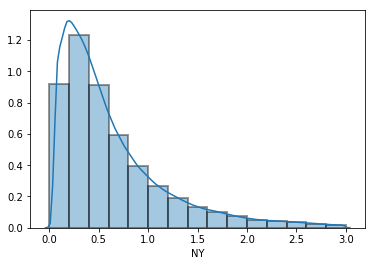

In [24]:
sns.distplot(d['Pricem/m'],kde=True,bins=15,hist_kws=dict(edgecolor="k", linewidth=2),axlabel="NY")

In [25]:
Boroughs = (dfz["Borough"].unique().tolist())[0:6]
dn=pd.DataFrame(columns=['mean','std'],index=Boroughs)

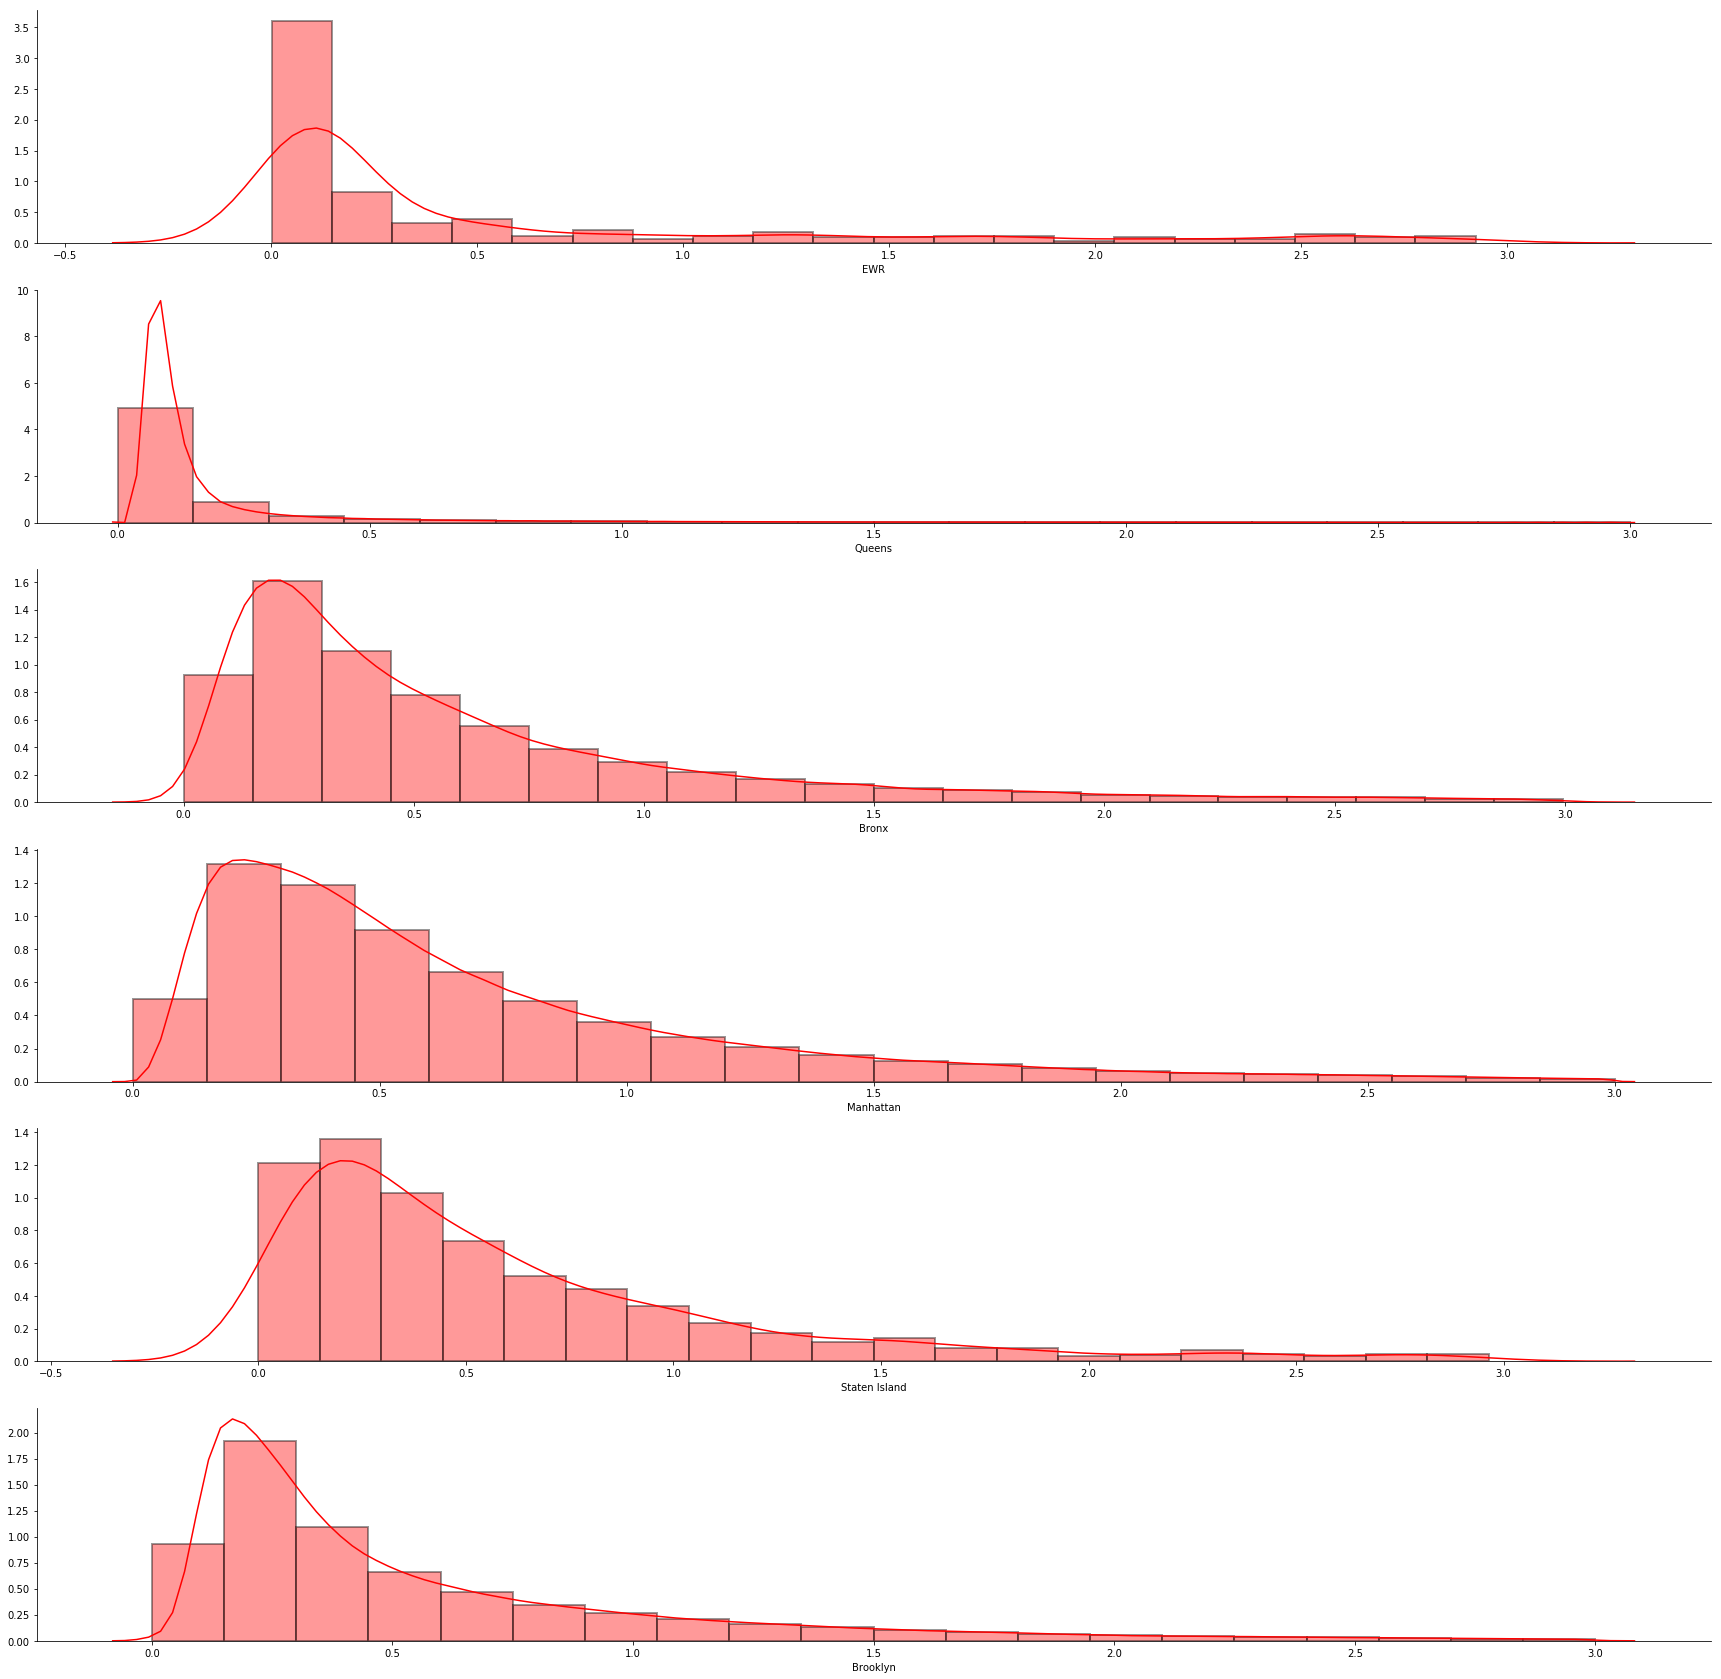

In [26]:
import matplotlib.pyplot as plt
i=0
Boroughs = (dfz["Borough"].unique().tolist())[0:6]
fig, axes = plt.subplots(6,1,figsize=(30,30))
for l in Boroughs:
    a=dfz.loc[dfz.Borough==l]
    a=a.dropna()
    m=a["Pricem/m"].mean()
    s=a["Pricem/m"].std()
    dn.loc[l,"mean"]=m
    dn.loc[l,"std"]=s
    #ax_curr = axes[np.where(Boroughs == l)[0][0]]
    sns.distplot(a['Pricem/m'],kde=True,bins=20,color='red',hist_kws=dict(edgecolor="k", linewidth=2),ax=axes[i],axlabel=l)
    #sns.distplot(a['Pricem'],kde=True,bins=15,hist_kws=dict(edgecolor="k", linewidth=2,alpha=0.5),ax=ax_curr,label='Overall New York')
    #axes.legend()
    sns.despine()
    i+=1

In [29]:
dn

,mean,std
EWR,0.528459,0.756797
Queens,0.191754,0.312875
Bronx,0.590506,0.546286
Manhattan,0.667878,0.542886
Staten Island,0.59959,0.575232
Brooklyn,0.559876,0.531391


In [27]:
idx = pd.MultiIndex.from_product([boroughs,
                                  ['t-value', 'p-value', 'H0 hypothesis']])
col = boroughs
dtt = pd.DataFrame('-', idx, col)
for i in boroughs:
    print(i)
    a=dfz.loc[dfz.Borough==i]["Pricem/m"]
    a=a.dropna()
    for j in Boroughs1:
            b=dfz.loc[dfz.Borough==j]["Pricem/m"]
            b=b.dropna()
            t2, p2 = stats.ttest_ind(a,b)
            dtt.loc[(i,"t-value"),j]=t2
            dtt.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
                dtt.loc[(i,"H0 hypothesis"),j]='Fail to Reject H0'
            else:
                dtt.loc[(i,"H0 hypothesis"),j]='Reject H0'

EWR
Queens
Bronx
Manhattan
Staten Island
Brooklyn


In [28]:
dtt

EWR             Queens  \
EWR           t-value                        0            16.3175   
              p-value                        1        7.44663e-60   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Queens        t-value                 -16.3175                  0   
              p-value              7.44663e-60                  1   
              H0 hypothesis          Reject H0  Fail to Reject H0   
Bronx         t-value                  1.71355            256.153   
              p-value                0.0866193                  0   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Manhattan     t-value                  3.89472            1584.98   
              p-value              9.83131e-05                  0   
              H0 hypothesis          Reject H0          Reject H0   
Staten Island t-value                  1.61179            43.6768   
              p-value                  0.10724                  0   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Brooklyn      t-value                 0.896375            814.293   
              p-value                 0.370053                  0   
              H0 hypothesis  Fail to Reject H0          Reject H0   

                                         Bronx          Manhattan  \
EWR           t-value                 -1.71355           -3.89472   
              p-value                0.0866193        9.83131e-05   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Queens        t-value                 -256.153           -1584.98   
              p-value                        0                  0   
              H0 hypothesis          Reject H0          Reject H0   
Bronx         t-value                        0            -29.175   
              p-value                        1       4.03615e-187   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Manhattan     t-value                   29.175                  0   
              p-value             4.03615e-187                  1   
              H0 hypothesis          Reject H0  Fail to Reject H0   
Staten Island t-value                 0.549394           -4.21711   
              p-value                 0.582738        2.47458e-05   
              H0 hypothesis  Fail to Reject H0          Reject H0   
Brooklyn      t-value                  -11.497           -178.371   
              p-value              1.37335e-30                  0   
              H0 hypothesis          Reject H0          Reject H0   

                                 Staten Island           Brooklyn  
EWR           t-value                 -1.61179          -0.896375  
              p-value                  0.10724           0.370053  
              H0 hypothesis  Fail to Reject H0  Fail to Reject H0  
Queens        t-value                 -43.6768           -814.293  
              p-value                        0                  0  
              H0 hypothesis          Reject H0          Reject H0  
Bronx         t-value                -0.549394             11.497  
              p-value                 0.582738        1.37335e-30  
              H0 hypothesis  Fail to Reject H0          Reject H0  
Manhattan     t-value                  4.21711            178.371  
              p-value              2.47458e-05                  0  
              H0 hypothesis          Reject H0          Reject H0  
Staten Island t-value                        0            2.50359  
              p-value                        1          0.0122941  
              H0 hypothesis  Fail to Reject H0          Reject H0  
Brooklyn      t-value                 -2.50359                  0  
              p-value                0.0122941                  1  
              H0 hypothesis          Reject H0  Fail to Reject H0

### CRQ2

In [28]:
zones = pd.read_csv("taxi_zone_lookup.csv")
value_to_choropleth = pd.DataFrame([])
for i in range(6):
    string = "Filtered"+str(i+1)+".csv"
    df = pd.read_csv(string,usecols=["PULocationID","DOLocationID"])
    df.dropna(inplace=True)
    value_to_choropleth=value_to_choropleth.append(df,ignore_index=True)
    del df

In [29]:
#merge the DataFrame value_to_choropleth with zone.csv
value_to_choropleth_start = pd.merge(value_to_choropleth,zones, left_on=['PULocationID'], right_on=['LocationID'])[['Zone','PULocationID']]
#used groupby and count in order to have a dataframe with zone and the count of trips started in every zone
test=value_to_choropleth_start.groupby(['Zone'],as_index=False).count()
test.columns=['Zone','Counter']
value_to_choropleth_start2 = pd.merge(test,zones, left_on=['Zone'], right_on=['Zone'])


In [30]:
map_1 = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap',
 zoom_start=12)

In [31]:
with open('taxi_zones.json') as f:
    data = json.load(f)

In [32]:
# .choropleth function of folium is used to see the choropleth map
map_1.choropleth(
    geo_data='taxi_zones.json',
    data=value_to_choropleth_start2,
    columns=['LocationID','Counter'],
    key_on='feature.properties.LocationID',
    fill_color='YlOrRd',
    legend_name='Taxi Counter',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale = [20,200,2000,20000,200000,2000000]
    
)
map_1.save('GeoJSON_New_york_Start.html')

In [33]:
value_to_choropleth_end = pd.merge(value_to_choropleth,zones, left_on=['DOLocationID'], right_on=['LocationID'])[['Zone','DOLocationID']]
test1=value_to_choropleth_end.groupby(['Zone'],as_index=False).count()
test1.columns=['Zone','Counter']
value_to_choropleth_end2 = pd.merge(test1,zones, left_on=['Zone'], right_on=['Zone'])

In [34]:
map_1.choropleth(
    geo_data='taxi_zones.json',
    data=value_to_choropleth_end2,
    columns=['LocationID','Counter'],
    key_on='feature.properties.LocationID',
    fill_color='YlOrRd',
    legend_name='Taxi Counter',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale = [20,200,2000,20000,200000,2000000]
    
)
map_1.save('GeoJSON_New_york_end.html')